<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description-of-the-project" data-toc-modified-id="Description-of-the-project-1">Description of the project</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1">Objective</a></span></li></ul></li><li><span><a href="#Step-1.-Download-data" data-toc-modified-id="Step-1.-Download-data-2">Step 1. Download data</a></span><ul class="toc-item"><li><span><a href="#Step-2.-Process-the-data" data-toc-modified-id="Step-2.-Process-the-data-2.1">Step 2. Process the data</a></span><ul class="toc-item"><li><span><a href="#2.1-Replace-column-names" data-toc-modified-id="2.1-Replace-column-names-2.1.1">2.1 Replace column names</a></span></li><li><span><a href="#2.2-Handle-gaps-if-necessary:" data-toc-modified-id="2.2-Handle-gaps-if-necessary:-2.1.2">2.2 Handle gaps if necessary:</a></span></li></ul></li><li><span><a href="#Step-3:-Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Step-3:-Exploratory-Data-Analysis-(EDA)-2.2">Step 3: Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#3.1-Describe-charactiristics-of-clients-who-tend-to-leave-the-bank-(do-user-segmentation):" data-toc-modified-id="3.1-Describe-charactiristics-of-clients-who-tend-to-leave-the-bank-(do-user-segmentation):-2.2.1">3.1 Describe charactiristics of clients who tend to leave the bank (do user segmentation):</a></span></li></ul></li><li><span><a href="#Step-4.-Formulate-and-test-statistical-hypotheses." data-toc-modified-id="Step-4.-Formulate-and-test-statistical-hypotheses.-2.3">Step 4. Formulate and test statistical hypotheses.</a></span><ul class="toc-item"><li><span><a href="#4.1-Test-the-income-difference-hypothesis-between-those-customers-who-left-and-those-who-stayed." data-toc-modified-id="4.1-Test-the-income-difference-hypothesis-between-those-customers-who-left-and-those-who-stayed.-2.3.1">4.1 Test the income difference hypothesis between those customers who left and those who stayed.</a></span></li><li><span><a href="#4.2-Test-the-hypothesis-that-the-average-scoring-score-of-women-is-higher-than-that-of-men." data-toc-modified-id="4.2-Test-the-hypothesis-that-the-average-scoring-score-of-women-is-higher-than-that-of-men.-2.3.2">4.2 Test the hypothesis that the average scoring score of women is higher than that of men.</a></span></li></ul></li><li><span><a href="#Step-5.-Conclusions-and-basic-recommendations-for-working-with-clients." data-toc-modified-id="Step-5.-Conclusions-and-basic-recommendations-for-working-with-clients.-2.4">Step 5. Conclusions and basic recommendations for working with clients.</a></span></li></ul></li></ul></div>

# Description of the project   

## Objective

Analyze the clients of a regional bank and identify the characteristics of clients who tend to leave the bank.



# Step 1. Download data


In [1]:
#import the required libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from plotly import graph_objects as go
import plotly.express as px
from prettytable import PrettyTable

try:
    data = pd.read_csv('~/datasets/bank_dataset.csv') #load data
except:
    data = pd.read_csv('/datasets/bank_dataset.csv')

data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [2]:
#display general information about the table and estimate the number of gaps
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In the first step, we saved our table into a variable and displayed the main information. We can immediately notice that it's necessary to lowercase the column names and also deal with the balance column, because there are a lot of missing values.

## Step 2. Process the data

### 2.1 Replace column names

In [3]:
# lowercase column names

data.columns = data.columns.str.lower()

data

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


### 2.2 Handle gaps if necessary:
As we have already noticed, the balance column contains a large number of missing values, it is necessary to find out the reason, maybe this is an error or there might a logical explanation for this.
Let's start a small investigation and count the number of passes in the segments, highlighting the main and most logical ones (city, credit card, loyalty)

In [4]:
rybinsk = data.query('city == "Рыбинск"')
display('The number of gaps in the balance sheet in Rybinsk',rybinsk['balance'].isna().sum())

yaroslavl = data.query('city == "Ярославль"')
display('The number of gaps in the balance sheet in Yaroslavl',yaroslavl['balance'].isna().sum())

rostov_velikii = data.query('city == "Ростов Великий"')
display('Number of passes in the balance sheet in Rostov the Great' ,rostov_velikii['balance'].isna().sum())

'The number of gaps in the balance sheet in Rybinsk'

1199

'The number of gaps in the balance sheet in Yaroslavl'

2418

'Number of passes in the balance sheet in Rostov the Great'

0

There is one small clue - there is not enough data for only two cities, Rybinsk and Yaroslavl. We can display the percentage for clarity.

In [5]:
display('Proportion of missing values in the balance field in Rybinsk', 
        (rybinsk['balance'].isna().sum()/rybinsk['userid'].count()*100).round())


display('Proportion of missing values in the balance field in Yaroslavl', 
        (yaroslavl['balance'].isna().sum()/yaroslavl['userid'].count()*100).round())

'Proportion of missing values in the balance field in Rybinsk'

48.0

'Proportion of missing values in the balance field in Yaroslavl'

48.0

In [6]:
#look at the gaps in the creditcard column

display(data.query('creditcard == 0')["balance"].isna().sum())


display(data.query('creditcard == 1')["balance"].isna().sum())

#estimate the percentage

display("Proportion of missing values in the credit card balance column"  , 
        (data.query('creditcard == 0')["balance"].isna().sum()/len(data.query('creditcard == 0').index)*100).round(2))


display("Proportion of missing values in column balance without credit card" , 
        (data.query('creditcard == 1')["balance"].isna().sum()/len(data.query('creditcard == 1').index)*100).round(2))

1025

2592

'Proportion of missing values in the credit card balance column'

34.8

'Proportion of missing values in column balance without credit card'

36.74

In [7]:
#look at the gaps in the loyalty column

display(data.query('loyalty == 0')["balance"].isna().sum())


display(data.query('loyalty == 1')["balance"].isna().sum())

#estimate the percentage

display("Proportion of missing values in column balance loyal customer" , 
        (data.query('loyalty == 0')["balance"].isna().sum()/len(data.query('loyalty == 0').index)*100).round(2))


display("Proportion of missing values in column balance disloyal customer" , 
        (data.query('loyalty == 1')["balance"].isna().sum()/len(data.query('loyalty == 1').index)*100).round(2))

1744

1873

'Proportion of missing values in column balance loyal customer'

35.97

'Proportion of missing values in column balance disloyal customer'

36.36

And here, you can see a certain pattern, now we will display two tables for cities with only missing values, maybe we will immediately see some kind of feature.

In [8]:
balance_rybinsk = rybinsk.loc[pd.isna(rybinsk["balance"]), :]

display(balance_rybinsk)


balance_yaroslavl = yaroslavl.loc[pd.isna(yaroslavl["balance"]), :]

display(balance_yaroslavl)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684.81,0
21,15640681,636,Рыбинск,Ж,32,8,NaN,2,1,0,138555.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9955,15654074,714,Рыбинск,М,29,4,NaN,2,1,1,37605.90,0
9961,15609279,573,Рыбинск,М,44,9,NaN,2,1,0,107124.17,0
9962,15637348,702,Рыбинск,М,44,9,NaN,1,0,0,59207.41,1
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0


,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,15699446,613,Ярославль,М,40,4,NaN,1,0,0,151325.24,0
9988,15632065,775,Ярославль,М,30,4,NaN,2,1,0,49337.84,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


In [9]:
display(rybinsk.query('creditcard == 0')["balance"].isna().sum())

display(rybinsk.query('creditcard == 1')["balance"].isna().sum())

347

852

There are no obvious patterns in the datasets: both contain women and men, with and without credit cards, loyal and disloyal

According to our research, there is a certain pattern in the number of gaps, we don't have opportunity to clarify the information and data from the customer, for further work on the project we are making the assumption that the data is not provided in full.

At this stage, we have prepared the data for further research

## Step 3: Exploratory Data Analysis (EDA)

### 3.1 Describe charactiristics of clients who tend to leave the bank (do user segmentation):


- Look at the average values of features in two groups - those who left and those who stayed, build histograms and look at the distribution of features
- Select the main features by which we will group customers, evaluate the share of the outflow. See which groups are prone to churn and which are reliable.
- Write  conclusions

In [10]:
#display the average values to have an idea on which columns we will do segmentation if we see strong differences

data.drop(columns = ['userid']).groupby(['churn']).mean()

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


According to the data above, there's a slight difference in the average values, the most significant are age and loyalty. Let's build histograms so it will be more clear, let's evaluate the distribution.

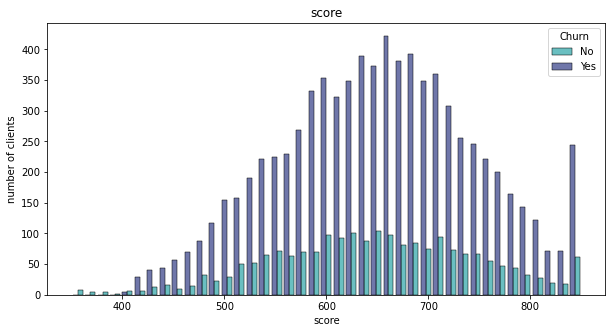

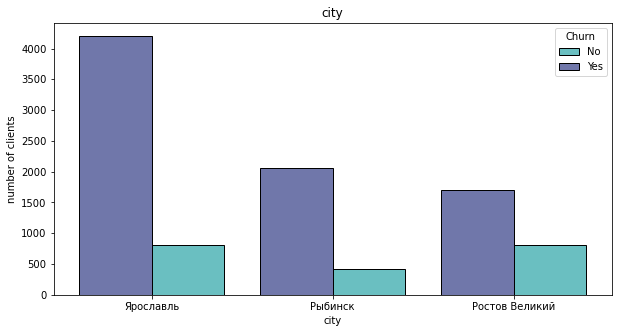

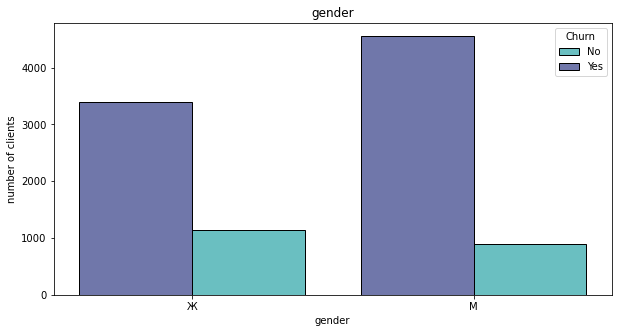

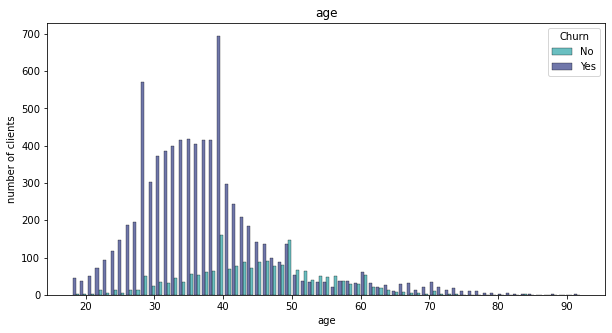

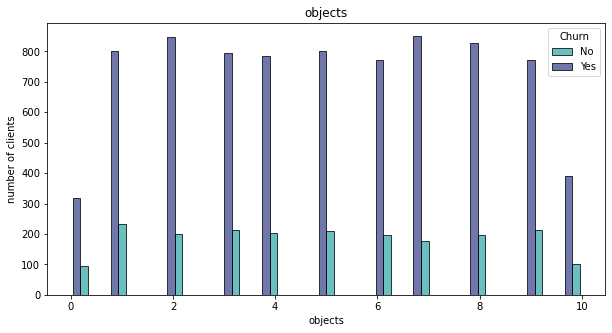

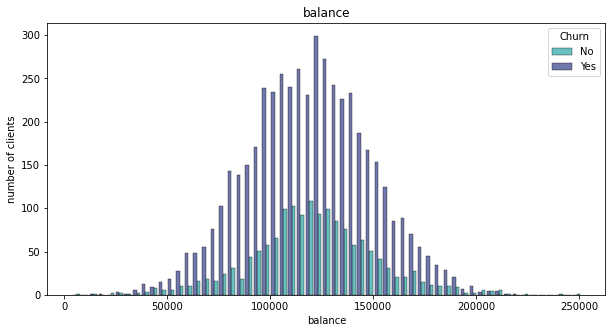

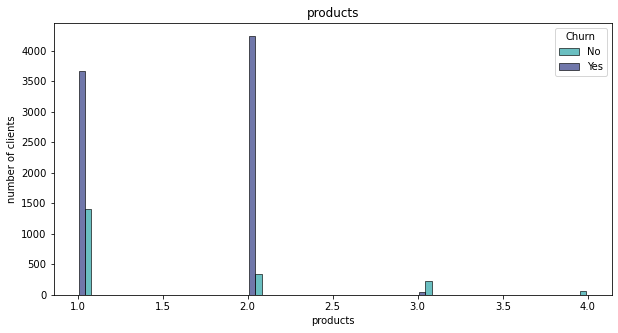

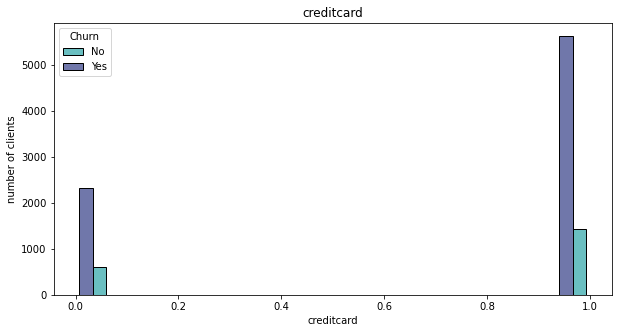

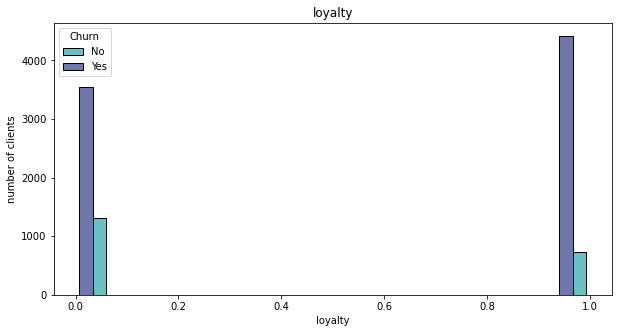

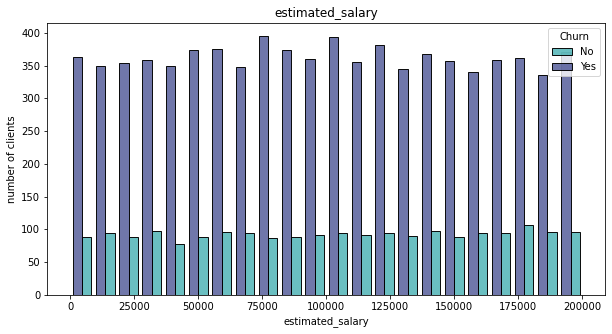

In [11]:
iterate_columns = data.drop(columns = ['churn','userid' ]).columns.values.tolist()

# write a loop for building histograms
for column in iterate_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=column, hue="churn", multiple="dodge", shrink=.8, palette="mako")
    plt.title(column)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.ylabel("number of clients")
    plt.show()

In these charts, we plotted the distribution within each feature in the churn column. Based on the graphs, we can conclude that the main features for grouping our clients are city, age, gender, bank products. Let's take a closer look at each feature.

In [26]:
#So let's group by city and look at the outflow for each city separately

churned = data.groupby('city').count()['churn'].reset_index().set_index('city');

churned_by_city = data.query('churn == 1').groupby('city').count()['churn'].reset_index().set_index('city')

display(churned_by_city)

city_churn_perc = (churned_by_city/churned *100).round(2)

city_churn_perc.columns=['% churn by city']

display(city_churn_perc)

fig = px.bar(
    city_churn_perc.reset_index(), x='city', y='% churn by city', color='city', text = '% churn by city', 
    title='% churn by city'
)

fig.update_xaxes(tickangle=45)
fig.show() 

,churn
city,
Ростов Великий,814
Рыбинск,413
Ярославль,810


,% churn by city
city,
Ростов Великий,32.44
Рыбинск,16.67
Ярославль,16.15


We can see that the outflow in Yaroslavl and Rybinsk is almost the same at 16%, but the leader is Rostov the Great - 32%.

In [21]:
#let's group by customer gender and look at the outflow

churned_gender = data.groupby('gender').count()['churn'].reset_index().set_index('gender');

churned_by_gender = data.query('churn == 1').groupby('gender').count()['churn'].reset_index().set_index('gender')

display(churned_by_gender)

gender_churn_perc = (churned_by_gender/len(data['churn'])*100).round(2)

gender_churn_perc.columns=['% churn of total customers']

display(gender_churn_perc)

gender_churn_perc1 = (churned_by_gender/churned_gender*100).round(2)

gender_churn_perc1.columns=['% churn within each customer group']

display(gender_churn_perc1)

fig = px.bar(
            gender_churn_perc.reset_index(), x='gender', y='% churn of total customers', color='gender', text = '% churn of total customers',
            title='% Churn of Total Customers'
        )

fig.update_xaxes(tickangle=45)
fig.show()

,churn
gender,
Ж,1139
М,898


,% churn of total customers
gender,
Ж,11.39
М,8.98


,% churn within each customer group
gender,
Ж,25.07
М,16.46


In [ ]:
So women tend to leave the bank more often than men

In [25]:
#let's group by product and look at the outflow

churned_products = data.groupby('products').count()['churn'].reset_index().set_index('products');

churned_by_products= data.query('churn == 1').groupby('products').count()['churn'].reset_index().set_index('products');

display(churned_by_products)

products_churn_perc = (churned_by_products/churned_products *100).round(2)

products_churn_perc.columns=['% churn within each group']

display(products_churn_perc)

fig = px.bar(
    products_churn_perc.reset_index(), x='products', y='% churn within each group', color='products', text = '% churn within each group', 
    title='% churn within each group'
)

fig.update_xaxes(tickangle=45)
fig.show() 



,churn
products,
1,1409
2,348
3,220
4,60


,% churn within each group
products,
1,27.71
2,7.58
3,82.71
4,100.00


Customer churn by product shows us that the most churn customers are those who have 3 and 4 products and 1 product,the most churn resistant customer with 2 banking products.

In [20]:
#let's group by age and look at the outflow from the total number of bank customers

churned_age = data.groupby('age').count()['churn'].reset_index().set_index('age');

churned_by_age= data.query('churn == 1').groupby('age').count()['churn'].reset_index().set_index('age');

display(churned_by_age.sort_values(by='churn', ascending=False))

age_churn_perc = (churned_by_age/len(data['churn'])*100).round(2)

age_churn_perc.columns=['% churn of total customers']

display(age_churn_perc.sort_values(by='% churn of total customers', ascending=False).head(20))


,churn
age,
46,91
40,89
43,88
45,87
48,80
42,77
47,77
49,75
44,73


,% churn of total customers
age,
46,0.91
40,0.89
43,0.88
45,0.87
48,0.80
42,0.77
47,0.77
49,0.75
44,0.73


In [15]:
#напишем функцию классификации
def churn_group(churn):
     
    if churn <= 20 :
        return 'stable group'
    if churn > 20 and churn <= 40:
        return 'sufficiently stable group'
    if churn > 40 and churn <= 60:
        return 'unstable group'
    return 'most unstable group'

churned_by_age['churn_group'] = churned_by_age['churn'].apply(churn_group)

pd.set_option('display.max_colwidth', 10000)
churned_by_age.reset_index().groupby('churn_group').agg({'age': ['unique']}).reset_index()\
                                 .rename(columns = {'churn_group': 'churn group', 
                                          'unique': 'client age'})
                                 


,churn group,age
,,client age
0,most unstable group,"[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]"
1,stable group,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 84]"
2,sufficiently stable group,"[28, 29, 30, 31, 32, 34, 53, 57, 58, 59, 60, 61, 62]"
3,unstable group,"[33, 35, 36, 54, 55, 56]"


I decided to divide clients by age into four groups, depending on the amount of churn, in order to make a conclusion easier. And so the most prone to churn are customers aged 37 to 52, and the most stable group of customers aged between 18 and 27 and all other age categories starting from 63 years.

## Step 4. Formulate and test statistical hypotheses.

### 4.1 Test the income difference hypothesis between those customers who left and those who stayed.

We test the first research hypothesis: The income between those customers who left and those who remained is different. It is transformed into two statistical hypotheses:

- H0: income between clients is different
- H1: income between clients is the same

Let's do a t-test using the scipy.stats.ttest_ind method(array1, array2) 

In [16]:
churned = data[data['churn'] == 1]['estimated_salary']
stayed = data[data['churn'] == 0]['estimated_salary']

alpha = .05 # critical level of statistical significance
# if p-value is less than it - reject the hypothesis

results = st.ttest_ind(
    churned, 
    stayed)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
     print("Reject the null hypothesis")
else:
     print("Failed to reject null hypothesis")

p-value:  0.22644042802223346
Failed to reject null hypothesis


The income between those customers who left and those who remained is different

### 4.2 Test the hypothesis that the average scoring score of women is higher than that of men.

We test the second research hypothesis: the average scoring score of women is higher than that of men. It is transformed into two statistical hypotheses:

- H0: the average scoring score for women is higher
- H1: the average scoring score for women is the same

Let's do a t-test using the scipy.stats.ttest_1samp method to test a one-tailed hypothesis

In [17]:
score_f = data[data['gender'] == 'Ж']['score']
score_m = data[data['gender'] == 'М']['score']
score_m_mean = score_m.mean()


results = st.ttest_1samp(
    score_f, 
    score_m_mean)

print('p-value: ', results.pvalue/2)

if (results.pvalue / 2 < alpha) and (score_f.mean() > score_m_mean):
     print("Reject the null hypothesis")
else:
     print("Failed to reject null hypothesis")

p-value:  0.34970320264260235
Failed to reject null hypothesis


We do not reject the null hypothesis, which means that the average scoring score for women is higher than for men.

## Step 5. Conclusions and basic recommendations for working with clients.

In conclusion, I would like to say that a lot of work has been done in the field of data analysis based on the information provided by the interregional bank. The aim of the work - to define the characteristics of clients who tend to leave the bank. At the stage of data preprocessing, a large number of gaps were noticed in the Balance field, after a detailed analysis, I came to the conclusion that the data provided by the customer was incomplete.
In the stage of exploratory data analysis, we identified 4 segments:

Segment 1 by city, the largest number of customers fall into the outflow in the city of Rostov the Great -32%, in the other two cities the distribution of outflow is at the same level -16%, which also casts doubt on the reliability and completeness of the information provided by the customer. As a recommendation, you can advise the bank branch in Rostov Veliky to learn from the experience of their colleagues from the other two cities with less churn, look at the products they offer, or at the system of interaction with customers, this may have an effect on the churn.

2nd segment by gender, the outflow among women is 25%, the outflow among men is 16.4%, as methods for retaining or attracting, it is possible to recommend the introduction of special programs aimed at women, for example, a mortgage lending program for women or special loan programs for women - entrepreneurs.

3rd segment in terms of banking products, the most resistant to outflow are the owners of two banking products - 7.6%, less stable customers with one product - 28% and the most unstable customers - with three and four products, based on the data, we can conclude that a bank is possible offers not particularly favorable conditions for products, it is worth reviewing them, or introducing new products.

4th segment by age. We made a grouping by age of clients and divided them into 4 categories:

"stable group" from 18 to 27 years and from 63 to 84
"fairly stable group" (age 28, 29, 30, 31, 32, 34, 53, 57, 58, 59, 60, 61, 62)
"unstable group" (ages 33, 35, 36, 54, 55, 56)
"the most unstable group" from 37 to 52 years

Since we found a significant outflow between the ages of 33 and 56, it is most likely that the bank should think about improving or introducing banking products for people in this age group. As we can see, these are not students or pensioners, so most likely these clients may be interested in some project with salary cards, you can also, for example, offer favorable conditions for VHI, or make an interesting loan offer for salary clients.

We also carried out two statistical hypotheses, as a result of which we concluded that the income between those clients who left and those who remained was different and that the average scoring score for women was higher than for men.